 ### Importowanie bibliotek

In [1]:
import pandas as pd
import opendatasets as od
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import chardet

### Pobieranie zbioru danych

In [2]:
od.download('https://www.kaggle.com/datasets/jjayfabor/lettuce-growth-days')
#{"username":"jakubbg","key":"e42b293c818e4ecd7b9365ee037af428"}

Skipping, found downloaded files in ".\lettuce-growth-days" (use force=True to force download)


### Czytanie zbioru danych z pliku csv

In [3]:
with open('./lettuce-growth-days/lettuce_dataset_updated.csv', 'rb') as f:
    result = chardet.detect(f.read())

dataset = pd.read_csv('./lettuce-growth-days/lettuce_dataset_updated.csv', encoding=result['encoding'])
length = len(dataset)

print(dataset.head())

   Plant_ID      Date  Temperature (ï¿½C)  Humidity (%)  TDS Value (ppm)  \
0         1  8/3/2023                33.4            53              582   
1         1  8/4/2023                33.5            53              451   
2         1  8/5/2023                33.4            59              678   
3         1  8/6/2023                33.4            68              420   
4         1  8/7/2023                33.4            74              637   

   pH Level  Growth Days  Temperature (F)  Humidity  
0       6.4            1            92.12      0.53  
1       6.1            2            92.30      0.53  
2       6.4            3            92.12      0.59  
3       6.4            4            92.12      0.68  
4       6.5            5            92.12      0.74  


### Wyświetlenie informacji o zbiorze danych

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Plant_ID            3169 non-null   int64  
 1   Date                3169 non-null   object 
 2   Temperature (ï¿½C)  3169 non-null   float64
 3   Humidity (%)        3169 non-null   int64  
 4   TDS Value (ppm)     3169 non-null   int64  
 5   pH Level            3169 non-null   float64
 6   Growth Days         3169 non-null   int64  
 7   Temperature (F)     3169 non-null   float64
 8   Humidity            3169 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 222.9+ KB
None


### Sprawdzenie czy występują puste wiersze

In [5]:
print(dataset.isnull().sum())

Plant_ID              0
Date                  0
Temperature (ï¿½C)    0
Humidity (%)          0
TDS Value (ppm)       0
pH Level              0
Growth Days           0
Temperature (F)       0
Humidity              0
dtype: int64


### Statystyki zbioru

In [6]:
print(dataset.describe())

          Plant_ID  Temperature (ï¿½C)  Humidity (%)  TDS Value (ppm)  \
count  3169.000000         3169.000000   3169.000000      3169.000000   
mean     35.441780           28.142222     64.873462       598.045440   
std      20.243433            4.670521      8.988985       115.713047   
min       1.000000           18.000000     50.000000       400.000000   
25%      18.000000           23.600000     57.000000       498.000000   
50%      35.000000           30.200000     65.000000       593.000000   
75%      53.000000           31.500000     73.000000       699.000000   
max      70.000000           33.500000     80.000000       800.000000   

          pH Level  Growth Days  Temperature (F)     Humidity  
count  3169.000000  3169.000000      3169.000000  3169.000000  
mean      6.399211    23.141054        82.655999     0.648735  
std       0.234418    13.077107         8.406938     0.089890  
min       6.000000     1.000000        64.400000     0.500000  
25%       6.200000    

### Rozkład wartości poszczególnych parametrów

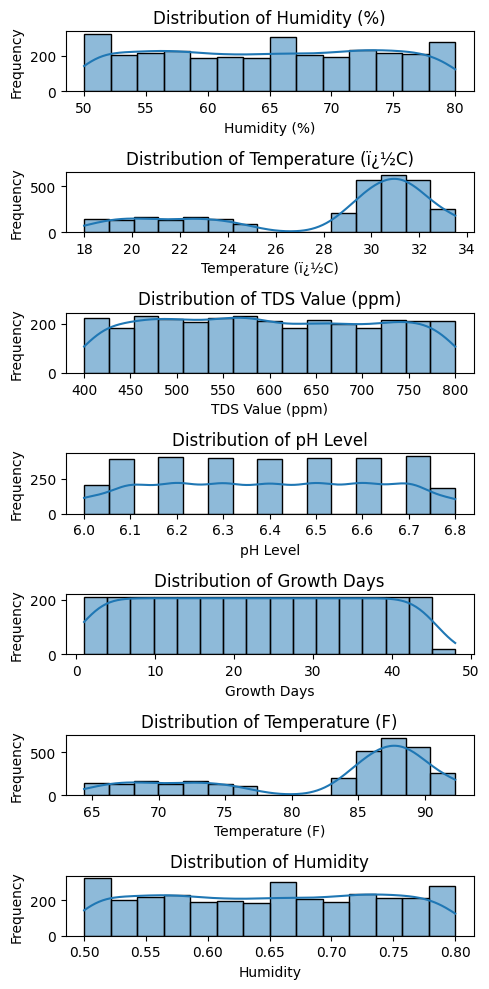

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_to_plot = ['Humidity (%)','Temperature (ï¿½C)','TDS Value (ppm)','pH Level','Growth Days','Temperature (F)','Humidity']

fig, axs = plt.subplots(len(feature_to_plot), figsize=(5, 10))

for i, feature in enumerate(feature_to_plot):
    sns.histplot(dataset[feature], ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

### Normalizacja danych liczbowych do zakresu [0,1]

In [8]:
columns = ['Humidity (%)','Temperature (ï¿½C)','TDS Value (ppm)','pH Level','Growth Days','Temperature (F)','Humidity']

for col in columns:
    dataset[col] = preprocessing.MinMaxScaler().fit_transform(dataset[col].values.reshape(-1, 1))

print(dataset.head())

   Plant_ID      Date  Temperature (ï¿½C)  Humidity (%)  TDS Value (ppm)  \
0         1  8/3/2023            0.993548           0.1           0.4550   
1         1  8/4/2023            1.000000           0.1           0.1275   
2         1  8/5/2023            0.993548           0.3           0.6950   
3         1  8/6/2023            0.993548           0.6           0.0500   
4         1  8/7/2023            0.993548           0.8           0.5925   

   pH Level  Growth Days  Temperature (F)  Humidity  
0     0.500     0.000000         0.993548       0.1  
1     0.125     0.021277         1.000000       0.1  
2     0.500     0.042553         0.993548       0.3  
3     0.500     0.063830         0.993548       0.6  
4     0.625     0.085106         0.993548       0.8  


### Podział danych na podzbiory train/dev/test

In [9]:
# 60 / 20 / 20
X_train, X_test = train_test_split(dataset, train_size=0.8, random_state=1)
X_train, X_dev = train_test_split(X_train, test_size=0.25, random_state=1)

### Rozmiar pozbiorów

In [10]:
print("Set length: "+str(length))
print("Train subset length: "+str(len(X_train))+"  "+str("{:.2f}".format(len(X_train)/length*100))+" %")
print("Dev subset length: "+str(len(X_dev))+"  "+str("{:.2f}".format(len(X_dev)/length*100))+" %")
print("Test subset length: "+str(len(X_test))+"  "+str("{:.2f}".format(len(X_test)/length*100))+" %")

Set length: 3169
Train subset length: 1901  59.99 %
Dev subset length: 634  20.01 %
Test subset length: 634  20.01 %
